<IPython.core.display.Javascript object>


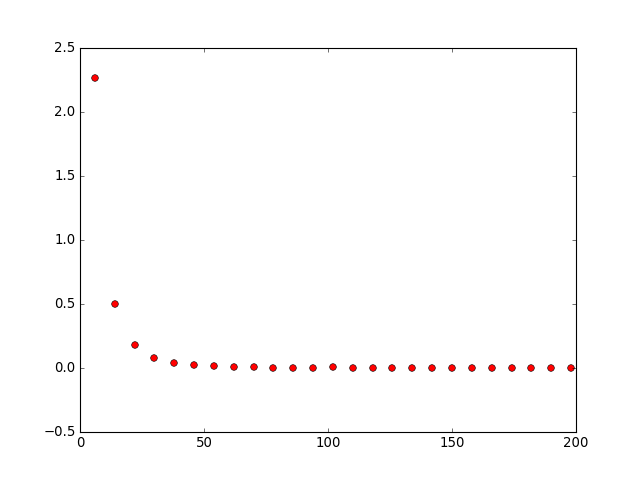

<IPython.core.display.Javascript object>


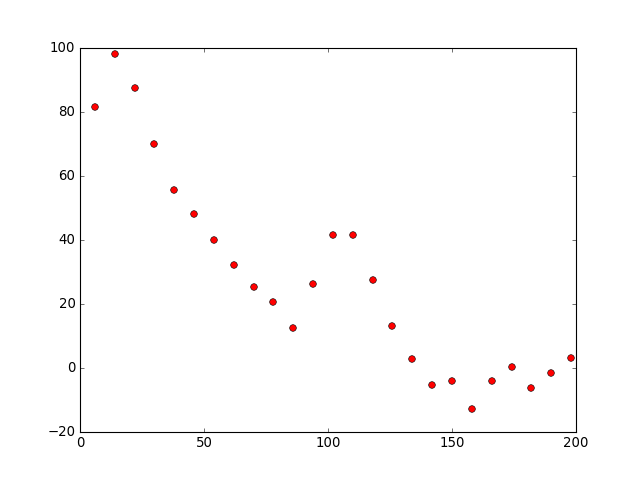

In [48]:
#%matplotlib inline
import numpy as np
import matplotlib
matplotlib.use("nbagg")
import matplotlib.pyplot as plt
import scipy as sp
from scipy.special import erf
import math as mt


#r = np.loadtxt('Anderson_2013_CMASSDR10_corrfunction_x0x2_postrecon.dat')
#print r.T

#np.savetxt('Anderson_2013_CMASSDR10_corfun_x0x2_postrecon.txt',r.T)

r, xi0, xi2 = np.loadtxt('Anderson_2013_CMASSDR10_corfun_x0x2_postrecon.txt')

plt.plot(r, xi0, 'o', color='r')
plt.show()
plt.plot(r, np.power(r,2)*xi0, 'o', color='r')
plt.show()


<IPython.core.display.Javascript object>


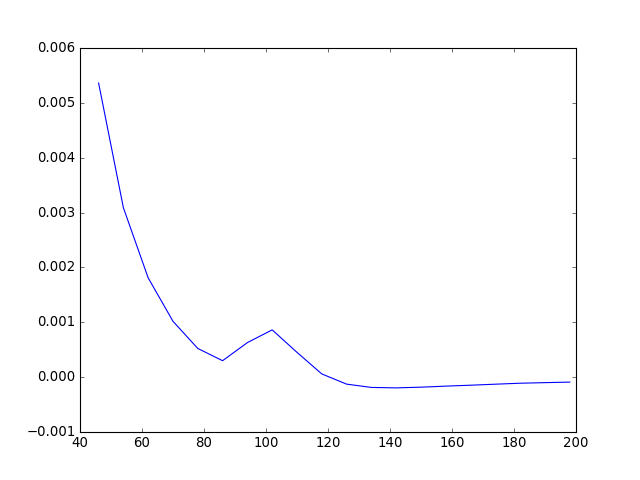

In [28]:
plt.plot(tab_bins,xi+tab_pol_good)
plt.show()

In [5]:
##Read the covariance matrix
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.special import erf
import math as mt





#r = np.loadtxt('Anderson_2013_CMASSDR10_corrfunction_cov_x0x2_postrecon.dat')
#print r.T

#np.savetxt('Anderson_2013_CMASSDR10_cov_x0x2_postrecon.txt',r.T)
r, xi0, xi2 = np.loadtxt('Anderson_2013_CMASSDR10_corfun_x0x2_postrecon.txt')

#ii, jj, cov = np.loadtxt('Anderson_2013_CMASSDR10_cov_x0x2_postrecon.txt')

#file_cov = 'Anderson_2013_CMASSDR10_corrfunction_cov_x0x2_postrecon.dat'

#f = open(file_cov, 'r')
#print f.readline()    # read the header
 

#Covariance matrix start at 46 Mpc/h
rcut = 46.
ind_cut = int(np.argmin(abs(r-rcut)))
nbb = len(r[ind_cut :])
tab_bins = r[ind_cut :]
tab_xi0 = xi0[ind_cut :]
tab_xi2 = xi2[ind_cut :]


tab_cov_xi0 = np.zeros( (nbb,nbb) )
tab_cov_xi2 = np.zeros( (nbb,nbb) )
cpt=0




for i in range(0, nbb):
    for j in range(0, nbb):
        l = f.readline()
        tab_cov_xi0[j,i] = float((str.split(l))[2])
        
for i in range(0, nbb):
    for j in range(0, nbb):
        l = f.readline()
        tab_cov_xi2[j,i] = float((str.split(l))[2])
        
        
np.savetxt('tab_cov_xi0_DR10.txt',  tab_cov_xi0 )
np.savetxt('tab_bins_DR10.txt', tab_bins)
        
plt.pcolormesh(tab_bins, tab_bins, tab_cov_xi0)
plt.title(r'$\xi_0(r)$ Covariance Matrix')
plt.xlabel('r')
plt.ylabel('r')
#plt.colorbar()
plt.show()

plt.pcolormesh(tab_bins, tab_bins, tab_cov_xi2)
plt.title(r" $ \xi_2(r)$ Covariance Matrix")
plt.xlabel('r')
plt.ylabel('r')
plt.colorbar()
plt.show()
#print np.max(tab_cov_xi0)

#print tab_bins

tab_err_xi0 = np.zeros(nbb)
tab_err_xi2 = np.zeros(nbb)

for i in range(0,nbb):
    tab_err_xi0[i] = tab_cov_xi0[i,i]
    tab_err_xi2[i] = tab_cov_xi2[i,i]

plt.errorbar(tab_bins, np.power(tab_bins,2)*tab_xi0,np.power(tab_bins,2)*np.sqrt(tab_err_xi0), fmt='o', color='b' )
plt.xlabel('r')
plt.ylabel(r'$r^2\xi_0(r)$')
plt.show()
plt.errorbar(tab_bins, np.power(tab_bins,2)*tab_xi2,np.power(tab_bins,2)*np.sqrt(tab_err_xi2), fmt='o', color='green' )
plt.xlabel('r')
plt.ylabel(r'$r^2\xi_2(r)$')
plt.show()


#plt.pcolormesh( (np.matrix()).I )

cov_mat = np.matrix(tab_cov_xi0)
#print cov_mat.I
cov_inv = cov_mat.I

A = np.squeeze(np.asarray(cov_inv))
plt.pcolormesh( tab_bins, tab_bins,A)
plt.title(r'$ Cov^{-1}$ for $\xi_0$')
plt.xlabel('r')
plt.ylabel('r')
plt.show()


NameError: name 'f' is not defined

In [25]:
tab_bins

array([  46.,   54.,   62.,   70.,   78.,   86.,   94.,  102.,  110.,
        118.,  126.,  134.,  142.,  150.,  158.,  166.,  174.,  182.,
        190.,  198.])

Using CAMB installed at /home/favio/Documents/UNAM/SegundoSemestre/Congresos/CosmoStatSchool
326 20.2532532533
478 29.2302302302
646 39.1521521522
[326 478 646]
[ 20.25325325  29.23023023  39.15215215]


<IPython.core.display.Javascript object>


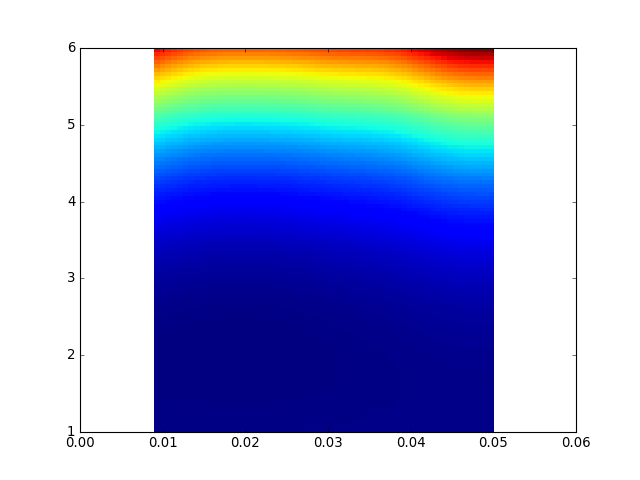

In [46]:
#Part to fit some theoritical correlation functions
#Need to execute the part above to work

#%matplotlib inline
import sys, platform, os
from matplotlib import pyplot as plt
import numpy as np
#uncomment this if you are running remotely and want to keep in synch with repo changes
#if platform.system()!='Windows':
#    !cd $HOME/git/camb; git pull github master; git log -1
print('Using CAMB installed at '+ os.path.realpath(os.path.join(os.getcwd(),'..')))
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))

import camb
from camb import model, initialpower

import scipy.integrate as integrate
import scipy.special as special
from scipy.interpolate import interp1d

tab_cov_xi0  =np.loadtxt('tab_cov_xi0_DR10.txt')
tab_bins = np.loadtxt('tab_bins_DR10.txt')
cov_mat = np.matrix(tab_cov_xi0)
#print cov_mat.I
cov_inv = cov_mat.I

nbb = len(tab_bins)

tab_err_xi0 = np.zeros(nbb)

nb_bias = 100
tab_bias=np.linspace(1., 6., nb_bias)

#
arrob = np.linspace(0.009,0.050,60)
#

tab_chi2 = np.zeros((len(arrob),nb_bias))
tab_chi2_cov = np.zeros((len(arrob),nb_bias))

for indx in range(len(arrob)):

#pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=67.5, ombh2=arrob[indx], omch2=0.122)
    pars.set_dark_energy() #re-set defaults
    pars.InitPower.set_params(ns=0.965)
#Not non-linear corrections couples to smaller scales than you want
    pars.set_matter_power(redshifts=[ 0.55], kmax=10.0)

#Linear spectra
#pars.NonLinear = model.NonLinear_none
#Non-Linear spectra
    pars.NonLinear = model.NonLinear_none
    results = camb.get_results(pars)
    kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=10, npoints = 5000)
    s8 = np.array(results.get_sigma8())

    xi = np.zeros(nbb)

    #np.savetxt('tab_cov_xi0_DR10.txt',  tab_cov_xi0 )
    #np.savetxt('tab_bins_DR10.txt', tab_bins)



    for i in range(0,nbb):
        tab_err_xi0[i] = tab_cov_xi0[i,i]


    kstart = 0
    kcut = 10
    kcut_ind = np.argmin( abs(kh - kcut))

    factor = np.power(kh[kstart:kcut_ind],2) * pk[0,kstart:kcut_ind] / (kh[kstart:kcut_ind]*2*np.pi**2)
    for i in range(0, nbb):
            IntegrandXi0 = factor * np.sin(kh[kstart:kcut_ind]*tab_bins[i]) / tab_bins[i]
            xi[i] = np.trapz(IntegrandXi0,kh[kstart:kcut_ind])

    #bias = 2.1
        
# plt.errorbar(tab_bins, np.power(tab_bins,2)*tab_xi0,np.power(tab_bins,2)*np.sqrt(tab_err_xi0), fmt='o', color='b' )
# plt.xlabel('r')
# plt.ylabel(r'$r^2\xi_0(r)$')
# plt.plot(tab_bins, np.power(tab_bins,2)*xi*bias**2, color='r' )
# plt.show()


###FIT bias#####
# nb_bias = 21
# tab_bias=np.linspace(1., 3., nb_bias)
# tab_chi2 = np.zeros(nb_bias)
# tab_chi2_cov = np.zeros(nb_bias)

    vals_err = np.power(tab_bins,2)*np.sqrt(tab_err_xi0)
    vals_measure = np.power(tab_bins,2)*tab_xi0

    for i in range(0, nb_bias):
        vals_mod = np.power(tab_bins,2)*xi*tab_bias[i]**2
        vals_mod_cov = xi*tab_bias[i]**2
        tab_chi2[indx,i] = np.sum( np.power((vals_mod - vals_measure)/vals_err,2)  )
        tab_chi2_cov[indx,i] = np.dot( vals_mod_cov-tab_xi0 , np.dot( cov_inv , 
                                                                (vals_mod_cov.reshape( nbb,1)-
                                                                 tab_xi0.reshape(nbb,1) ) ) )

        
tab_chi2_cov_min = tab_chi2_cov.min()

#Values for 1,2 and 3 sigma for a gaussian
val1=0.68268949  
val2=0.95449974  
val3=0.9973002

vals = np.zeros(3)
vals[0] = val1
vals[1] = val2
vals[2] = val3

index_sig = np.zeros(3, int)


dof = nbb-2
nbs = 1000
tab_val = np.linspace(1,60, nbs)
tab_gi = np.zeros(nbs)
for i in range(len(tab_val)):
    tab_gi[i] = sp.special.gammainc(dof/2.,tab_val[i]/2)

#tab_gi = tab_gi/mt.gamma(dof/2.)
for i in range(len(vals)):
    index_sig[i] =  int(round(np.argmin( abs(tab_gi - vals[i]) )) )
    print (index_sig[i], tab_val[index_sig[i]])


print (index_sig)

levels = tab_val[index_sig]
print (levels)

#print sp.special.gammainc(dof/2., chi2/2)

# plt.semilogy(tab_bias, tab_chi2)
# plt.semilogy(tab_bias, tab_chi2_cov, '--')
# for i in range(0,3): plt.plot(tab_bias, np.zeros(nb_bias)+levels[i], label=(str(i+1))[0]+'$\sigma$' )
# plt.title(r'$ \chi^2$ for the bias  $N_{dof}=19' )
# plt.xlabel('bias')
# plt.ylabel(r'$\chi^2$')
# plt.legend()
# plt.show()

plt.pcolormesh(arrob,tab_bias,np.transpose(tab_chi2_cov))
plt.show()

#tab_delta_chi2 = tab_chi2_cov - tab_chi2_cov.min()
#t_min = np.unravel_index(tab_chi2_cov.argmin(), tab_chi2_cov.shape)

#plt.contour(tab_a1, tab_a2, np.transpose(tab_delta_chi2[:,:]), lev_dc)
#plt.show()



#  vals_mod0 = xi*tab_bias[np.argmin(tab_chi2)]**2 

#print vals_mod0.reshape( nbb,1)
# print (r'$\chi^2=$',np.dot( vals_mod0-tab_xi0 , np.dot( cov_inv , (vals_mod0.reshape( nbb,1)-tab_xi0.reshape(nbb,1) ) ) ))


####fit for polynom A(r) = A1/r^2 + a2/r + a3
# nbp=21
# tab_a1 = np.linspace(-1,1,21)
# tab_a2 = np.linspace(-1,1,21)
# tab_a3 = np.linspace(-1,1,21)

# b = tab_bias[np.argmin(tab_chi2)]

# tab_chi2_cov_a = np.zeros( (21,21,21) )

# for i in range(0, nbp):
#     for j in range(0, nbp):
#         for k in range(0, nbp):
#             tab_pol = tab_a1[i]/np.power(tab_bins,2) + tab_a2[j]/tab_bins + tab_a3[k]
#             vals_mod_cov = b**2*(xi + tab_pol)
#             tab_chi2_cov_a[i,j,k] = np.dot( vals_mod_cov-tab_xi0 , np.dot( cov_inv , 
#                                                                           (vals_mod_cov.reshape( nbb,1)-tab_xi0.reshape(nbb,1) ) ) )
            

# t_min = np.unravel_index(tab_chi2_cov_a.argmin(), tab_chi2_cov_a.shape)

# a1 = tab_a1[t_min[0]]
# a2 = tab_a2[t_min[1]]
# a3 = tab_a3[t_min[2]]


# print (a1, a2, a3)

# tab_pol_good = a1/np.power(tab_bins,2) + a2/tab_bins + a3

# plt.errorbar(tab_bins, np.power(tab_bins,2)*tab_xi0,np.power(tab_bins,2)*np.sqrt(tab_err_xi0), fmt='o', color='b' )
# plt.xlabel('r')
# plt.ylabel(r'$r^2\xi_0(r)$')
# plt.plot(tab_bins, np.power(tab_bins,2)*(xi+tab_pol_good)*b**2, color='r' )
# plt.show()

# plt.plot(tab_bins, tab_pol_good)
# plt.show()

In [12]:
####part to obtain the 1,2 and 3 sigmas values for a chi^2 distribution with number of degree of freedom dof

dof = 20     #####important part to modify

#Values for 1,2 and 3 sigma for a gaussian
val1=0.68268949  
val2=0.95449974  
val3=0.9973002

vals = np.zeros(3)
vals[0] = val1
vals[1] = val2
vals[2] = val3

index_sig = np.zeros(3, int)



nbs = 1000
tab_val = np.linspace(1,60, nbs)
tab_gi = np.zeros(nbs)
for i in range(len(tab_val)):
    tab_gi[i] = sp.special.gammainc(dof/2.,tab_val[i]/2)

#tab_gi = tab_gi/mt.gamma(dof/2.)
for i in range(len(vals)):
    index_sig[i] =  int(round(np.argmin( abs(tab_gi - vals[i]) )) )
    print (index_sig[i], tab_val[index_sig[i]])


print (index_sig)

levels = tab_val[index_sig]
print (levels)


363 22.4384384384
521 31.7697697698
696 42.1051051051
[363 521 696]
[ 22.43843844  31.76976977  42.10510511]


<IPython.core.display.Javascript object>


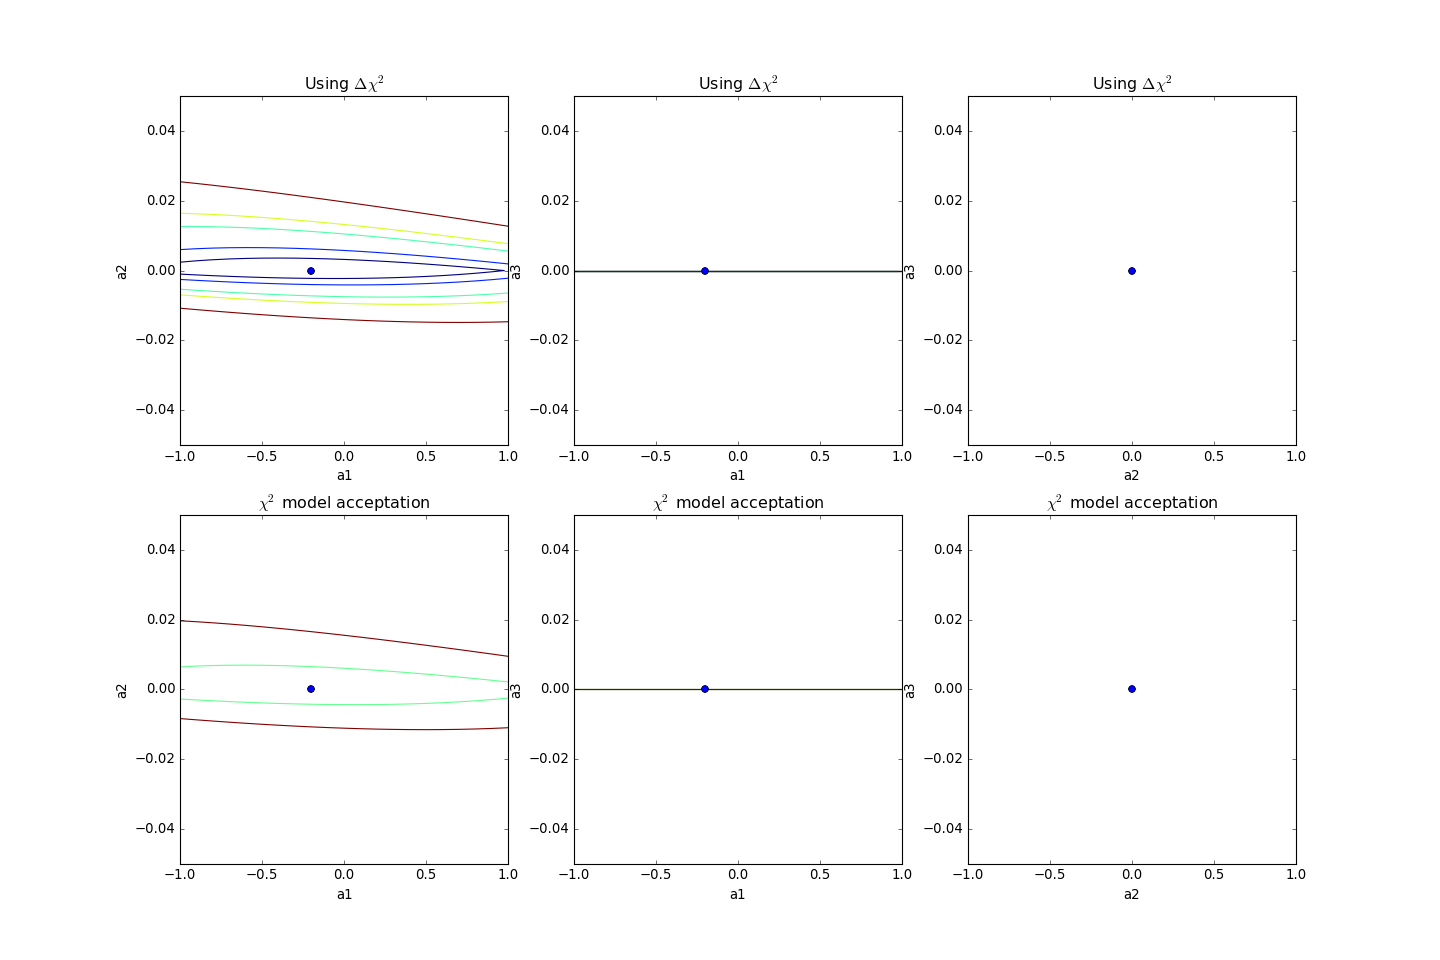

In [24]:
tab_delta_chi2 = tab_chi2_cov_a - tab_chi2_cov_a.min()

sigma1 = 3.50
sigma2 = 6.25
sigma3 = 11.30
sigma4 = 14.2
sigma5 = 21.1

lev_dc = np.array([sigma1, sigma2, sigma3,sigma4,sigma5])
fig, ax = plt.subplots(2,3, figsize=(18,12))

ax[0,0].contour(tab_a1, tab_a2, np.transpose(tab_delta_chi2[:,:, t_min[2]]), lev_dc)
ax[0,0].plot( [a1,a1], [a2,a2], 'o')
ax[0,0].set_ylim([-0.05,0.05])
ax[1,0].contour(tab_a1, tab_a2, np.transpose(tab_chi2_cov_a[:,:, t_min[2]]), levels)
ax[1,0].plot( [a1,a1], [a2,a2], 'o')
ax[1,0].set_ylim([-0.05,0.05])
ax[0,0].set_xlabel('a1')
ax[0,0].set_ylabel('a2')
ax[0,0].set_title('Using $\Delta\chi^2$')
ax[1,0].set_xlabel('a1')
ax[1,0].set_ylabel('a2')
ax[1,0].set_title('$\chi^2$ model acceptation')
#plt.show()
ax[0,1].contour(tab_a1, tab_a3, np.transpose(tab_delta_chi2[:,t_min[1] ,:]), lev_dc)
ax[0,1].plot( [a1,a1], [a3,a3], 'o')
ax[0,1].set_ylim([-0.05,0.05])
ax[1,1].contour(tab_a1, tab_a3, np.transpose(tab_chi2_cov_a[:,t_min[1] ,:]), levels)
ax[1,1].plot( [a1,a1], [a3,a3], 'o')
ax[1,1].set_ylim([-0.05,0.05])
ax[0,1].set_xlabel('a1')
ax[0,1].set_ylabel('a3')
ax[0,1].set_title('Using $\Delta\chi^2$')
ax[1,1].set_xlabel('a1')
ax[1,1].set_ylabel('a3')
ax[1,1].set_title('$\chi^2$ model acceptation')

ax[0,2].contour(tab_a2, tab_a3, np.transpose(tab_delta_chi2[t_min[0] ,:,: ]), lev_dc)
ax[0,2].plot( [a2,a2], [a3,a3], 'o')
ax[0,2].set_ylim([-0.05,0.05])
ax[1,2].contour(tab_a2, tab_a3, np.transpose(tab_chi2_cov_a[t_min[0] ,:,: ]), levels)
ax[1,2].plot( [a2,a2], [a3,a3], 'o')
ax[1,2].set_ylim([-0.05,0.05])
ax[0,2].set_xlabel('a2')
ax[0,2].set_ylabel('a3')
ax[0,2].set_title('Using $\Delta\chi^2$')
ax[1,2].set_xlabel('a2')
ax[1,2].set_ylabel('a3')
ax[1,2].set_title('$\chi^2$ model acceptation')
plt.show()

<IPython.core.display.Javascript object>


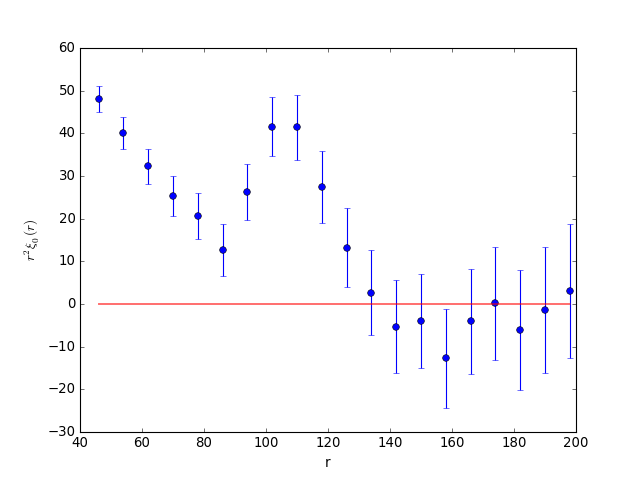

In [10]:
plt.errorbar(tab_bins, np.power(tab_bins,2)*tab_xi0,np.power(tab_bins,2)*np.sqrt(tab_err_xi0), fmt='o', color='b' )
plt.xlabel('r')
plt.ylabel(r'$r^2\xi_0(r)$')
plt.plot(tab_bins, tab_pol_good, color='r' )
plt.show()